In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os
import glob
import datetime

from scipy.stats import kendalltau
from scipy.special import comb
import math
import process 

In [40]:
def krcc_test(x, y):
    if len(x) == len(y):
        n = len(x)

        # default scipy is tau_b
        krcc = kendalltau(x, y)
        
        # https://github.com/mmhs013/pyMannKendall this also finds the tau and mann-kendall score but it doesnt do what we want
        
        print("KRCC =", krcc[0])

        # The two-sided p-value for a hypothesis test whose null hypothesis is an absence of association, tau = 0
        print("p value =", krcc[1])

    else:
        print("inconsistent number of points in x and y")

In [41]:
# Health Organizations
healthorg_df = pd.read_csv('./Processed Datasets/healthorg.csv')
healthorg_df = process.filter_dates(healthorg_df)


In [42]:
# News Outlets
leftnews_df = pd.read_csv('./Processed Datasets/leftnews.csv')
leftnews_df = process.filter_dates(leftnews_df)

rightnews_df = pd.read_csv('./Processed Datasets/rightnews.csv')
rightnews_df = process.filter_dates(rightnews_df)



In [43]:
# Individuals
leftind_df = pd.read_csv('./Processed Datasets/leftind.csv')
leftind_df = process.filter_dates(leftind_df)

rightind_df = pd.read_csv('./Processed Datasets/rightind.csv')
rightind_df = process.filter_dates(rightind_df)

celeb_df = pd.read_csv('./Processed Datasets/celebrities.csv')
celeb_df = process.filter_dates(celeb_df)

In [44]:
# fake / real
# still need to add covid_lies to fake data
fake_df = pd.read_csv('./Processed Datasets/fake.csv')
fake_df = process.filter_dates(fake_df)
real_df = pd.read_csv('./Processed Datasets/real.csv')
real_df = process.filter_dates(real_df)

In [45]:
# 1-Day Bin

healthorg_dates = healthorg_df.sort_values("date", ascending=True)["date"].value_counts()
rightind_dates = rightind_df.sort_values("date", ascending=True)["date"].value_counts()
leftind_dates = leftind_df.sort_values("date", ascending=True)["date"].value_counts()
rightnews_dates = rightnews_df.sort_values("date", ascending=True)["date"].value_counts()
leftnews_dates = leftnews_df.sort_values("date", ascending=True)["date"].value_counts()
celeb_dates = celeb_df.sort_values("date", ascending=True)["date"].value_counts()

fake_dates = fake_df.sort_values("date", ascending=True)["date"].value_counts()
real_dates = real_df.sort_values("date", ascending=True)["date"].value_counts()


In [46]:
# Bin
bins = '3D'

healthorg_df["date"] = pd.to_datetime(healthorg_df["date"])
rightind_df["date"] = pd.to_datetime(rightind_df["date"])
leftind_df["date"] = pd.to_datetime(leftind_df["date"])
rightnews_df["date"] = pd.to_datetime(rightnews_df["date"])
leftnews_df["date"] = pd.to_datetime(leftnews_df["date"])
celeb_df["date"] = pd.to_datetime(celeb_df["date"])
real_df["date"] = pd.to_datetime(real_df["date"])
fake_df["date"] = pd.to_datetime(fake_df["date"])

health_bins = pd.Series(index=healthorg_df.date, data=np.array(healthorg_df.count)).resample(bins).count().sort_index()
rightind_bins = pd.Series(index=rightind_df.date, data=np.array(rightind_df.count)).resample(bins).count().sort_index()
leftind_bins = pd.Series(index=leftind_df.date, data=np.array(leftind_df.count)).resample(bins).count().sort_index()
rightnews_bins = pd.Series(index=rightnews_df.date, data=np.array(rightnews_df.count)).resample(bins).count().sort_index()
leftnews_bins = pd.Series(index=leftnews_df.date, data=np.array(leftnews_df.count)).resample(bins).count().sort_index()
celeb_bins = pd.Series(index=celeb_df.date, data=np.array(celeb_df.count)).resample(bins).count().sort_index()
real_bins = pd.Series(index=real_df.date, data=np.array(real_df.count)).resample(bins).count().sort_index()
fake_bins = pd.Series(index=fake_df.date, data=np.array(fake_df.count)).resample(bins).count().sort_index()


In [47]:
healthorg_dates.sort_index()

2020-03-01     3
2020-03-02    40
2020-03-03    53
2020-03-04    24
2020-03-05    44
              ..
2020-05-21    29
2020-05-22    63
2020-05-23    16
2020-05-24    12
2020-05-25    37
Name: date, Length: 86, dtype: int64

Text(0.5, 1.0, 'Fake Tweets')

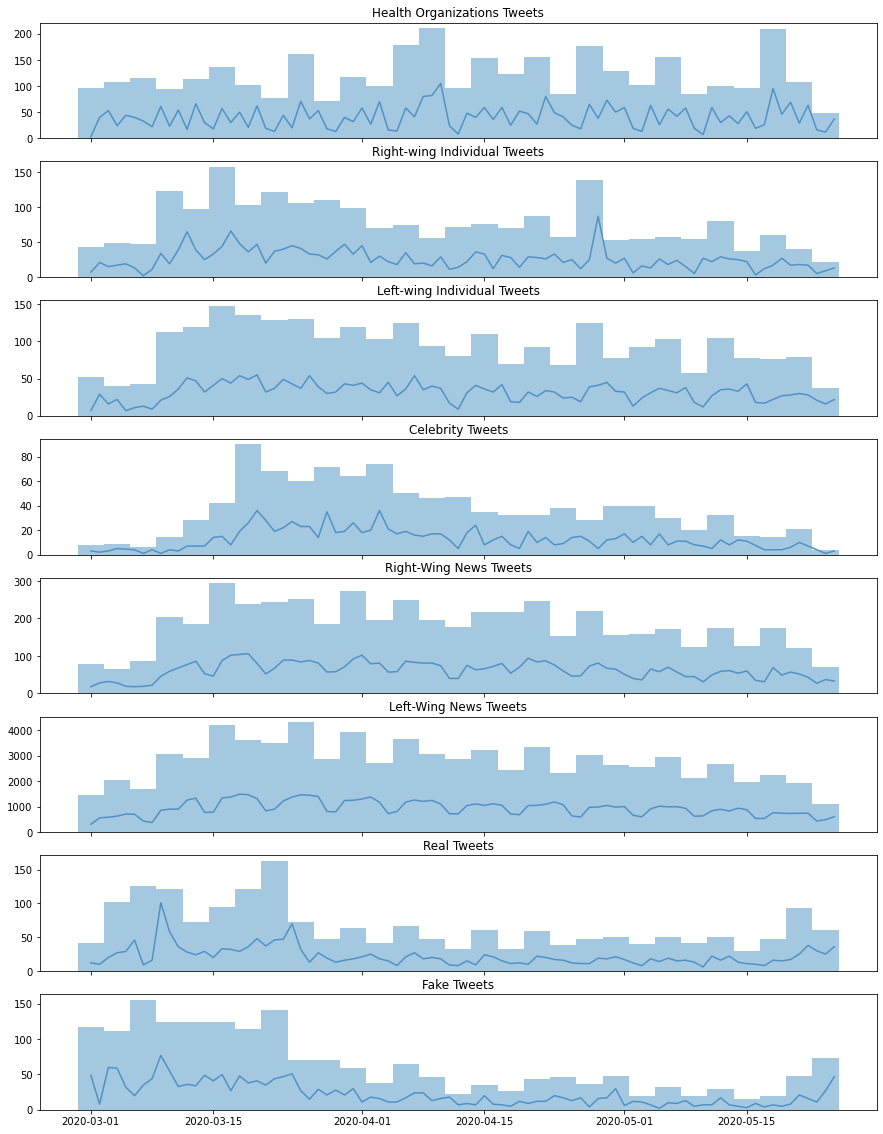

In [48]:
# plot
fig, axes = plt.subplots(8, 1, figsize=[15, 20], sharex=True)
axes[0].plot(healthorg_dates.sort_index(), color = '#4E92C5')
axes[0].bar(health_bins.index.sort_values(), health_bins, width=3, color = '#A5C8E1')
axes[0].set_title("Health Organizations Tweets")

axes[1].plot(rightind_dates.sort_index(), color = '#4E92C5')
axes[1].bar(rightind_bins.index.sort_values(), rightind_bins, width=3, color = '#A5C8E1')
axes[1].set_title("Right-wing Individual Tweets")

axes[2].plot(leftind_dates.sort_index(), color = '#4E92C5')
axes[2].bar(leftind_bins.index.sort_values(), leftind_bins, width=3, color = '#A5C8E1')
axes[2].set_title("Left-wing Individual Tweets")

axes[3].plot(celeb_dates.sort_index(), color = '#4E92C5')
axes[3].bar(celeb_bins.index.sort_values(), celeb_bins, width=3, color = '#A5C8E1')
axes[3].set_title("Celebrity Tweets")

axes[4].plot(rightnews_dates.sort_index(), color = '#4E92C5')
axes[4].bar(rightnews_bins.index.sort_values(), rightnews_bins, width=3, color = '#A5C8E1')
axes[4].set_title("Right-Wing News Tweets")

axes[5].plot(leftnews_dates.sort_index(), color = '#4E92C5')
axes[5].bar(leftnews_bins.index.sort_values(), leftnews_bins, width=3, color = '#A5C8E1')
axes[5].set_title("Left-Wing News Tweets")

axes[6].plot(real_dates.sort_index(), color = '#4E92C5')
axes[6].bar(real_bins.index.sort_values(), real_bins, width=3, color = '#A5C8E1')
axes[6].set_title("Real Tweets")

axes[7].plot(fake_dates.sort_index(), color = '#4E92C5')
axes[7].bar(fake_bins.index.sort_values(), fake_bins, width=3, color = '#A5C8E1')
axes[7].set_title("Fake Tweets")

In [49]:
print("HealthOrg Tweets: \t{}\nLeft Tweets: \t{}\nRight Tweets: \t{}\nCeleb Tweets: \t{}\nLeft News Outlet Tweets: \t{}\nRight News Outlet Tweets: \t{}\nFake Tweets:\t\t{}\nReal Tweets:\t\t{}\n".format(len(health_bins), len(leftind_bins), len(rightind_bins), len(celeb_bins), len(leftnews_bins), len(rightnews_bins), len(fake_bins), len(real_bins)))


HealthOrg Tweets: 	29
Left Tweets: 	29
Right Tweets: 	29
Celeb Tweets: 	29
Left News Outlet Tweets: 	29
Right News Outlet Tweets: 	29
Fake Tweets:		29
Real Tweets:		29



In [53]:
# only look at similar dates... so length is the same, need to find a better way

print("real and health")
krcc_test(real_bins, health_bins)
print("real and left")
krcc_test(real_bins, leftind_bins)
print("real and right")
krcc_test(real_bins, rightind_bins)
print("real and celeb")
krcc_test(real_bins[2:], celeb_bins)
print("real and left news")
krcc_test(real_bins, leftnews_bins)
print("real and right news")
krcc_test(real_bins, rightnews_bins)


real and health
KRCC = 0.012484404235973056
p value = 0.9251145162888145
real and left
KRCC = 0.31920199501246876
p value = 0.01614927844755776
real and right
KRCC = 0.23544442000447588
p value = 0.07445696327927474
real and celeb
inconsistent number of points in x and y
real and left news
KRCC = 0.26022804316284176
p value = 0.04865951170097692
real and right news
KRCC = 0.16873656924934236
p value = 0.20158666512733148


In [51]:
print("fake and health")
krcc_test(fake_bins, health_bins)
print("fake and left")
krcc_test(fake_bins, leftind_bins)
print("fake and right")
krcc_test(fake_bins, rightind_bins)
print("fake and celeb")
krcc_test(fake_bins[2:], celeb_bins)
print("fake and left news")
krcc_test(fake_bins, leftnews_bins)
print("fake and right news")
krcc_test(fake_bins, rightnews_bins)

fake and health
KRCC = -0.07980074688861064
p value = 0.5475860285660341
fake and left
KRCC = 0.22166891410402148
p value = 0.0945040757700503
fake and right
KRCC = 0.21287389563768133
p value = 0.10645591611342688
fake and celeb
inconsistent number of points in x and y
fake and left news
KRCC = 0.19802222850016868
p value = 0.13317405833318194
fake and right news
KRCC = 0.12143826166960031
p value = 0.3575973007058022
